# **Twitter sentiment analysis**

**Importing the libraries**

In [ ]:
import pandas as pd  
import numpy as np

**Loading dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tweet.csv",header=None, names=cols,encoding='latin-1')
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


**Performing exploratory analysis**

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   sentiment     1600000 non-null  int64 
 1   id            1600000 non-null  int64 
 2   date          1600000 non-null  object
 3   query_string  1600000 non-null  object
 4   user          1600000 non-null  object
 5   text          1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 556.1 MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   sentiment     1600000 non-null  int64 
 1   id            1600000 non-null  int64 
 2   date          1600000 non-null  object
 3   query_string  1600000 non-null  object
 4   user          1600000 non-null  object
 5   text          1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
df.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
text,0,0.0
user,0,0.0
query_string,0,0.0
date,0,0.0
id,0,0.0


In [ ]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [ ]:
df[df.sentiment == 0].head(10)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [ ]:
df[df.sentiment == 2].head()

,sentiment,text


In [ ]:
df[df.sentiment == 4].head(10)

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone
800005,4,@ProductOfFear You can tell him that I just bu...
800006,4,@r_keith_hill Thans for your response. Ihad al...
800007,4,"@KeepinUpWKris I am so jealous, hope you had a..."
800008,4,"@tommcfly ah, congrats mr fletcher for finally..."
800009,4,@e4VoIP I RESPONDED Stupid cat is helping me ...


In [ ]:
print(len(df))

1600000


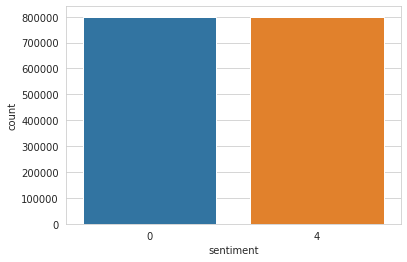

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='sentiment',data=df)

In [ ]:
# Number of unique tweets
unique_text = df.text.unique()
print(len(unique_text))

1581466


**Preprocessing a tweet**

In [ ]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [ ]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [ ]:
nums = [0,400000,800000,1200000,1600000]

In [ ]:
from past.builtins import xrange

In [ ]:
%%time
print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in xrange(nums[0],nums[1]):
    if( (i+1)%10000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, nums[1] ))                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 10000 of 400000 has been processed
Tweets 20000 of 400000 has been processed
Tweets 30000 of 400000 has been processed
Tweets 40000 of 400000 has been processed
Tweets 50000 of 400000 has been processed
Tweets 60000 of 400000 has been processed
Tweets 70000 of 400000 has been processed
Tweets 80000 of 400000 has been processed
Tweets 90000 of 400000 has been processed
Tweets 100000 of 400000 has been processed
Tweets 110000 of 400000 has been processed
Tweets 120000 of 400000 has been processed
Tweets 130000 of 400000 has been processed
Tweets 140000 of 400000 has been processed
Tweets 150000 of 400000 has been processed
Tweets 160000 of 400000 has been processed
Tweets 170000 of 400000 has been processed
Tweets 180000 of 400000 has been processed
Tweets 190000 of 400000 has been processed
Tweets 200000 of 400000 has been processed
Tweets 210000 of 400000 has been processed
Tweets 220000 of 400000 has been processed
Tweets 230000 of 400000 has

In [ ]:
%%time
print ("Cleaning and parsing the tweets...\n")
for i in xrange(nums[1],nums[2]):
    if( (i+1)%10000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, nums[2] ))                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 410000 of 800000 has been processed
Tweets 420000 of 800000 has been processed
Tweets 430000 of 800000 has been processed
Tweets 440000 of 800000 has been processed
Tweets 450000 of 800000 has been processed
Tweets 460000 of 800000 has been processed
Tweets 470000 of 800000 has been processed
Tweets 480000 of 800000 has been processed
Tweets 490000 of 800000 has been processed
Tweets 500000 of 800000 has been processed
Tweets 510000 of 800000 has been processed
Tweets 520000 of 800000 has been processed
Tweets 530000 of 800000 has been processed
Tweets 540000 of 800000 has been processed
Tweets 550000 of 800000 has been processed
Tweets 560000 of 800000 has been processed
Tweets 570000 of 800000 has been processed
Tweets 580000 of 800000 has been processed
Tweets 590000 of 800000 has been processed
Tweets 600000 of 800000 has been processed
Tweets 610000 of 800000 has been processed
Tweets 620000 of 800000 has been processed
Tweets 630000 of 8

In [ ]:
%%time
print ("Cleaning and parsing the tweets...\n")
for i in xrange(nums[2],nums[3]):
    if( (i+1)%10000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, nums[3] ))                                                                   
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 810000 of 1200000 has been processed
Tweets 820000 of 1200000 has been processed
Tweets 830000 of 1200000 has been processed
Tweets 840000 of 1200000 has been processed
Tweets 850000 of 1200000 has been processed
Tweets 860000 of 1200000 has been processed
Tweets 870000 of 1200000 has been processed
Tweets 880000 of 1200000 has been processed
Tweets 890000 of 1200000 has been processed
Tweets 900000 of 1200000 has been processed
Tweets 910000 of 1200000 has been processed
Tweets 920000 of 1200000 has been processed
Tweets 930000 of 1200000 has been processed
Tweets 940000 of 1200000 has been processed
Tweets 950000 of 1200000 has been processed
Tweets 960000 of 1200000 has been processed
Tweets 970000 of 1200000 has been processed
Tweets 980000 of 1200000 has been processed
Tweets 990000 of 1200000 has been processed
Tweets 1000000 of 1200000 has been processed
Tweets 1010000 of 1200000 has been processed
Tweets 1020000 of 1200000 has been pro

In [ ]:
%%time
print ("Cleaning and parsing the tweets...\n")
for i in xrange(nums[3],nums[4]):
    if( (i+1)%10000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, nums[4] ))                                                                   
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 1210000 of 1600000 has been processed
Tweets 1220000 of 1600000 has been processed
Tweets 1230000 of 1600000 has been processed
Tweets 1240000 of 1600000 has been processed
Tweets 1250000 of 1600000 has been processed
Tweets 1260000 of 1600000 has been processed
Tweets 1270000 of 1600000 has been processed
Tweets 1280000 of 1600000 has been processed
Tweets 1290000 of 1600000 has been processed
Tweets 1300000 of 1600000 has been processed
Tweets 1310000 of 1600000 has been processed
Tweets 1320000 of 1600000 has been processed
Tweets 1330000 of 1600000 has been processed
Tweets 1340000 of 1600000 has been processed
Tweets 1350000 of 1600000 has been processed
Tweets 1360000 of 1600000 has been processed
Tweets 1370000 of 1600000 has been processed
Tweets 1380000 of 1600000 has been processed
Tweets 1390000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1410000 of 1600000 has been processed
Tweets 1420000 of 1

In [ ]:
len(clean_tweet_texts)

1600000

**Before and after cleaning**

In [ ]:
df['Clean_text'] = clean_tweet_texts

In [ ]:
df

,sentiment,text,Clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that s a bummer you shoulda got david car...
1,0,is upset that he can't update his Facebook by ...,is upset that he can t update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am i h...
...,...,...,...
1599995,4,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,thewdb com very cool to hear old walt intervie...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,are you ready for your mojo makeover ask me fo...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday to my boo of alll time tupac...


**Creating new dataframe and csv with clean tweets**

In [ ]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [ ]:
clean_df.to_csv('clean_tweet.csv',index=False)

**Loading clean dataset**

In [ ]:
new_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/clean_tweet.csv')
new_df.head(10)

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0
5,not the whole crew,0
6,need a hug,0
7,hey long time no see yes rains a bit only a bi...,0
8,k nope they didn t have it,0
9,que me muera,0


In [ ]:
new_df.tail(10)

,text,target
1599990,wooooo xbox is back,4
1599991,mmmm that sounds absolutely perfect but my sch...,4
1599992,recovering from the long weekend,4
1599993,gritboys,4
1599994,forster yeah that does work better than just w...,4
1599995,just woke up having no school is the best feel...,4
1599996,thewdb com very cool to hear old walt intervie...,4
1599997,are you ready for your mojo makeover ask me fo...,4
1599998,happy th birthday to my boo of alll time tupac...,4
1599999,happy charitytuesday,4


In [ ]:
all_negative_tweets = new_df[new_df.target == 0]
all_positive_tweets = new_df[new_df.target == 4]

In [ ]:
new_df['text']=new_df['text'].apply(str)

In [ ]:
pos = all_positive_tweets[:40000]
neg = all_negative_tweets[:40000]

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

<Figure size 3600x2400 with 0 Axes>

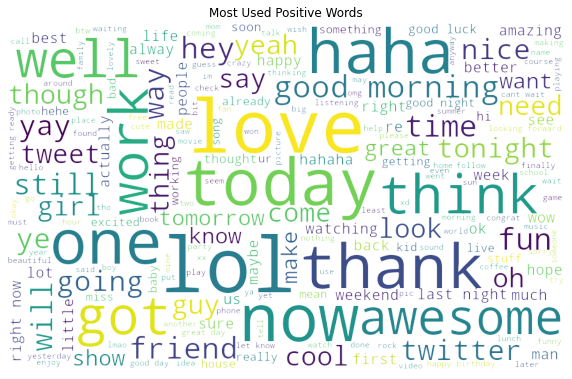

In [ ]:
positive_words =' '.join([text for text in new_df['text'][new_df['target'] == 4]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(positive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Positive Words")
plt.savefig('positive_words.png')
plt.show()

<Figure size 3600x2400 with 0 Axes>

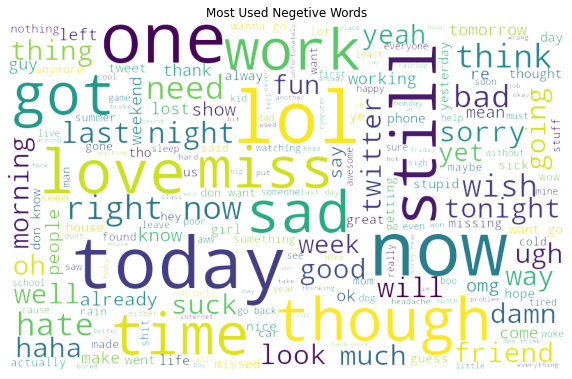

In [ ]:
negetive_words =' '.join([text for text in new_df['text'][new_df['target'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, 
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(negetive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Negetive Words")
plt.savefig('negetive_words.png')
plt.show()

In [ ]:
frame=[pos,neg]
new_df = pd.concat(frame)

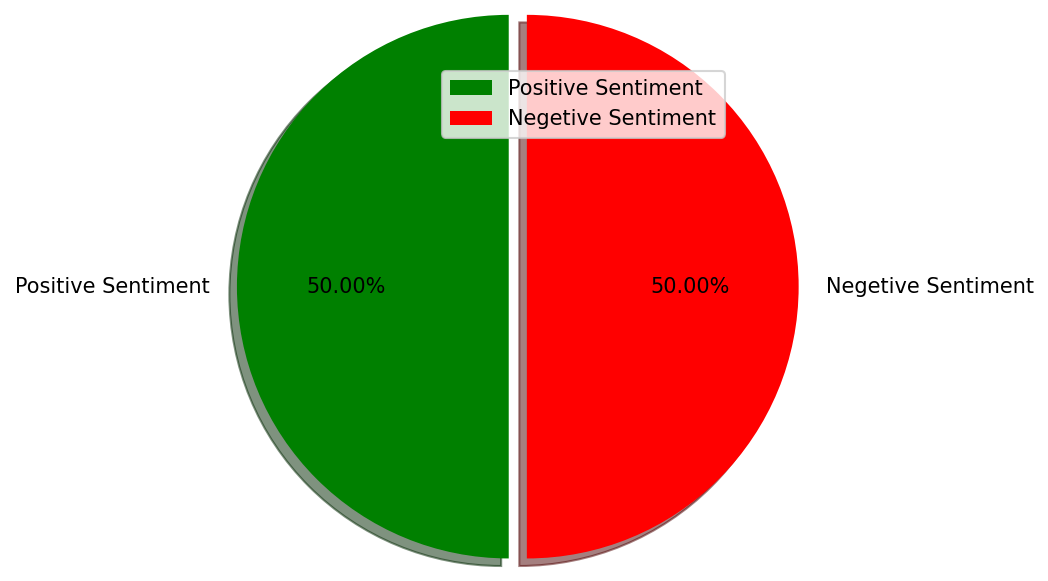

In [ ]:
plt.figure(dpi=150)
sentiments = ['Positive Sentiment', 'Negetive Sentiment'] 
slices = [(new_df['target'] != 0).sum(), (new_df['target'] == 0).sum()] 
colors = ['g', 'r'] 
plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show() 

**Splitting dataset into test and train (30:70)**

In [ ]:
df_x=new_df["text"]
df_y=new_df["target"]

In [ ]:
df_x=new_df["text"].apply(lambda x: np.str_(x))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=0.3 , random_state=48)

In [ ]:
x_train

1451328    so glad i got to see you guys in melbourne awe...
16218      i m so sad when i realized that i not stayed e...
252893                          i miss my internet at church
1580414    falling asleep time to put down the iphone cle...
1521991                                    hah i had no idea
                                 ...                        
1295302    oh yeah that doesn t even begin to describe it...
636736                                          ughhhhhhhhhh
829787                                  have a safe flight x
1537476    just finished eating some cinnamin toast crunc...
920115               happy mother s day to my mum i love her
Name: text, Length: 1120000, dtype: object

In [ ]:
y_train

1451328    4
16218      0
252893     0
1580414    4
1521991    4
          ..
1295302    4
636736     0
829787     4
1537476    4
920115     4
Name: target, Length: 1120000, dtype: int64

In [ ]:
x_test

76515      not leaving to school till nd period i missed ...
603756                      i woke up with a sore throat too
383661     oh that s pretty stupid no more ginx from toda...
1198303    haha he is very cute for all that he is so you...
1108266                               too hot cold showering
                                 ...                        
1073030    i know the feeling food has to be tasty me bot...
1317444    let me know if i ll see you at one of these da...
1563479                                             um party
691997                      big rick later going back to bed
206186     i ll be tech free for the next hrs i hope the ...
Name: text, Length: 480000, dtype: object

In [ ]:
y_test

76515      0
603756     0
383661     0
1198303    4
1108266    4
          ..
1073030    4
1317444    4
1563479    4
691997     0
206186     0
Name: target, Length: 480000, dtype: int64

**Performing Text Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)

In [ ]:
train_vectors.shape

(1120000, 42818)

In [ ]:
test_vectors.shape

(480000, 42818)

In [ ]:
a= train_vectors.toarray()
a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 50')

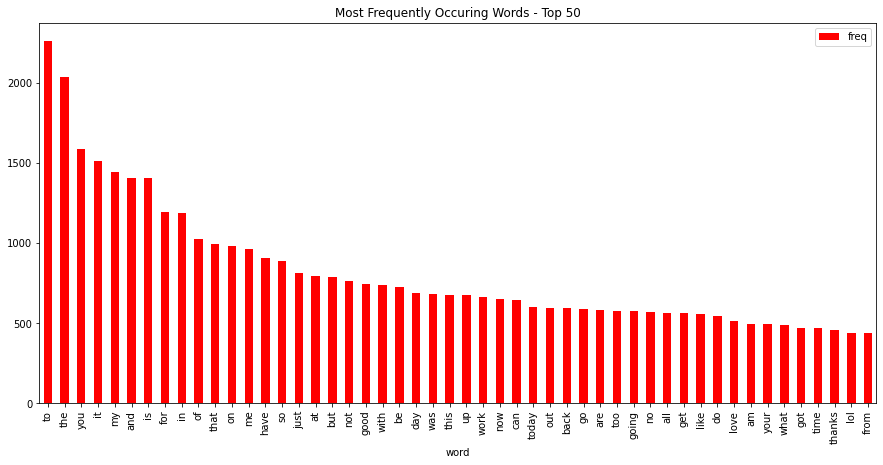

In [ ]:
sum_words = train_vectors.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(50).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'red')
plt.title("Most Frequently Occuring Words - Top 50")


**Creating a SVM Model**

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report

# Perform classification with SVM, kernel=linear

classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, y_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))

Training time: 464.399050s; Prediction time: 82.045853s


In [ ]:
print(classification_report(y_test, prediction_linear))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77     11891
           4       0.78      0.78      0.78     12109

    accuracy                           0.78     24000
   macro avg       0.78      0.78      0.78     24000
weighted avg       0.78      0.78      0.78     24000



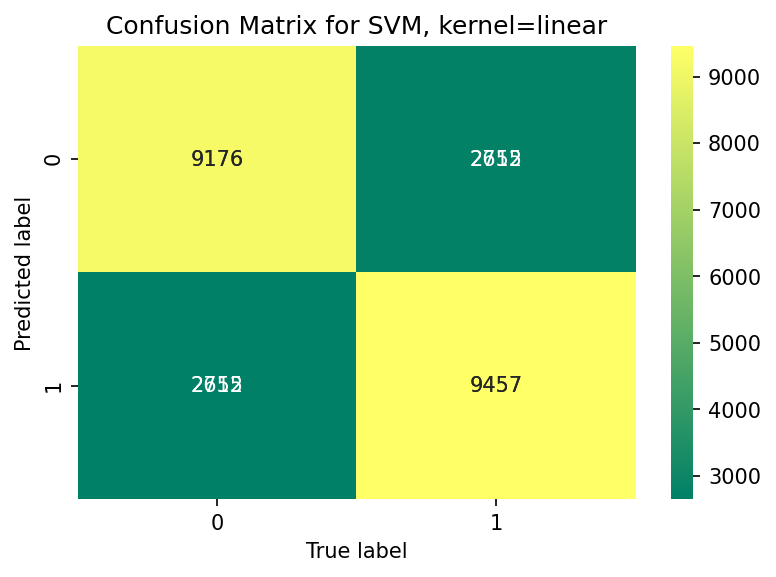

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(dpi=150)
mat = confusion_matrix(y_test, prediction_linear)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
sns.heatmap(mat,annot=True,fmt='3.0f',cmap="summer")

plt.title('Confusion Matrix for SVM, kernel=linear')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report

# Perform classification with SVM, kernel=linear

classifier_linear = svm.SVC(kernel='rbf')
t0 = time.time()
classifier_linear.fit(train_vectors, y_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))

Training time: 1088.303896s; Prediction time: 129.704312s


In [ ]:
print(classification_report(y_test, prediction_linear))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78     11891
           4       0.78      0.79      0.79     12109

    accuracy                           0.78     24000
   macro avg       0.78      0.78      0.78     24000
weighted avg       0.78      0.78      0.78     24000



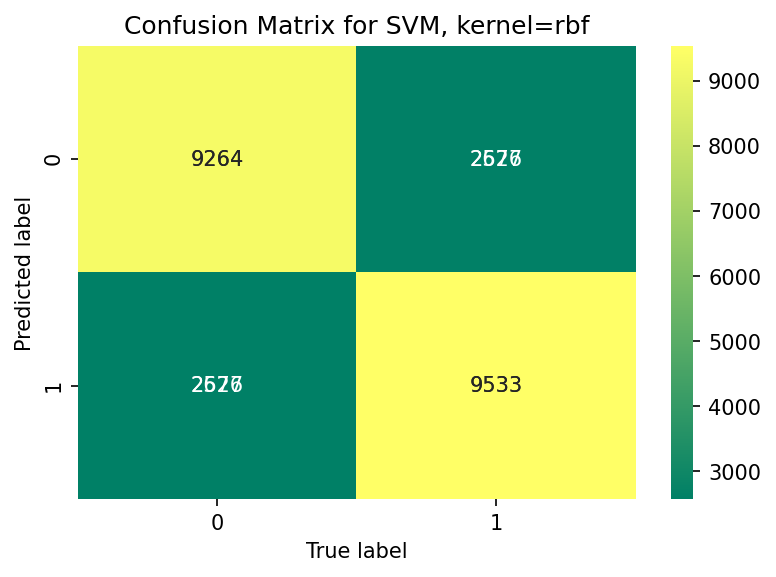

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(dpi=150)
mat = confusion_matrix(y_test, prediction_linear)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
sns.heatmap(mat,annot=True,fmt='3.0f',cmap="summer")

plt.title('Confusion Matrix for SVM, kernel=rbf')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

**Creating a Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5]:
    
    lr = LogisticRegression(C=c)
    lr.fit(train_vectors, y_train)
    y_predict_lr = lr.predict(test_vectors)
    print("Threshold :",c," --->", " Accuracy :",accuracy_score(y_test, y_predict_lr))

Threshold : 0.01  --->  Accuracy : 0.728875
Threshold : 0.05  --->  Accuracy : 0.7522083333333334
Threshold : 0.25  --->  Accuracy : 0.7697916666666667
Threshold : 0.5  --->  Accuracy : 0.7712916666666667


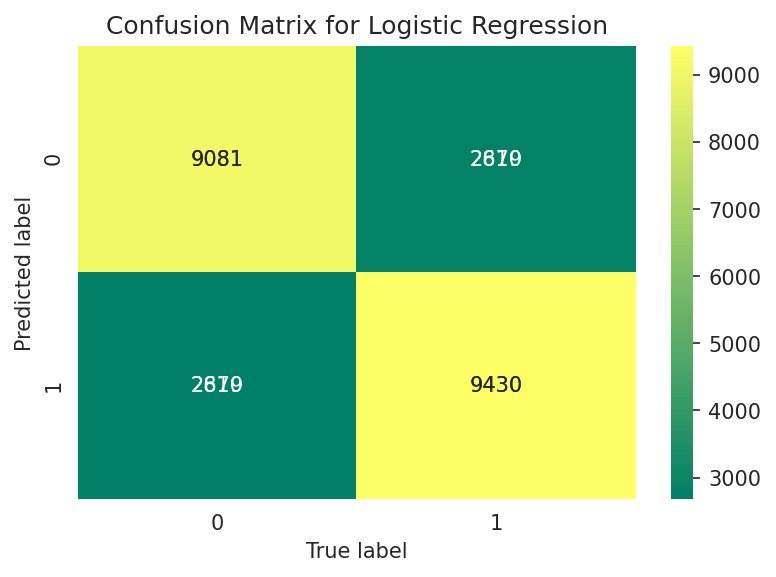

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=150)
mat = confusion_matrix(y_test, y_predict_lr)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
sns.heatmap(mat,annot=True,fmt='3.0f',cmap="summer")

plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

**Creating a Multinomial Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Training Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(train_vectors, y_train)
y_predict_nb = NB_model.predict(test_vectors)
print(accuracy_score(y_test, y_predict_nb))

0.7582083333333334


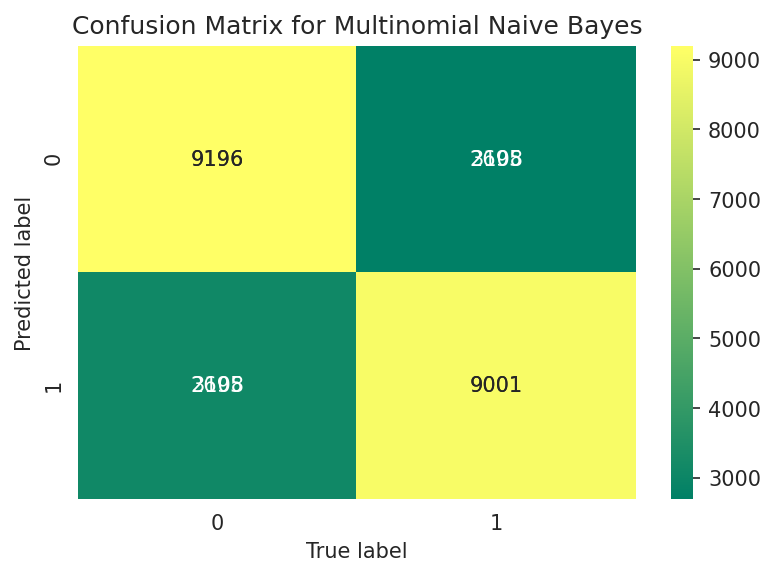

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=150)
mat = confusion_matrix(y_test, y_predict_nb)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
sns.heatmap(mat,annot=True,fmt='3.0f',cmap="summer")

plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig("confusion_matrix.png")
plt.show()